IMPORTING THE LIBRARIES

In [2]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score ,mean_squared_error, r2_score , confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

#this is a comment
# a comment from tarek


IMPORTING THE DATASET

In [3]:
df= pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


**Check of Data**

In [6]:
#shape
df.shape

(1190, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [8]:
#finding missing value
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [9]:
#finding duplicate
df.duplicated().sum()

272

In [12]:
#identifiying garbag values
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("****"*10)

Exploratory Data Analysis

In [13]:
#descriptve statics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


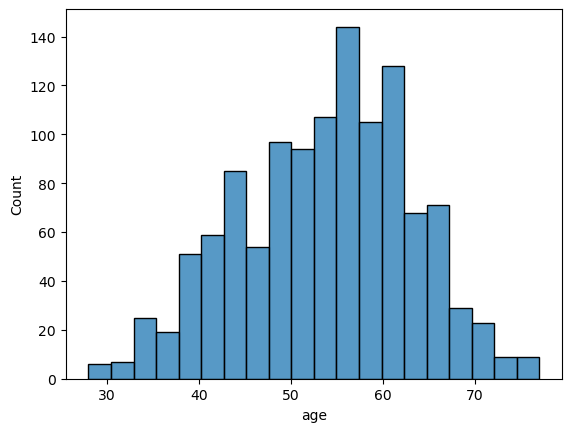

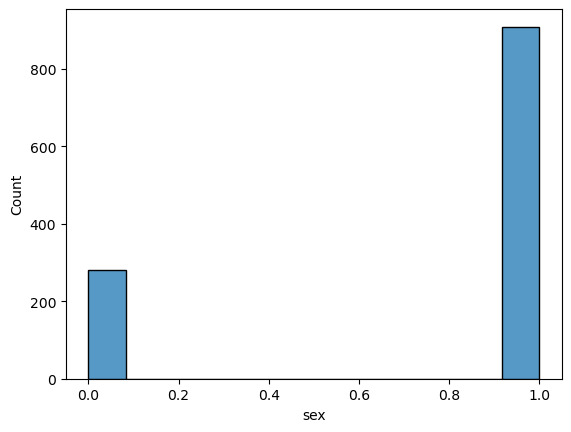

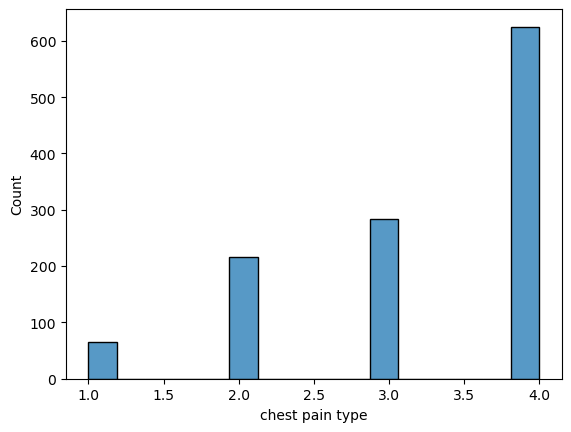

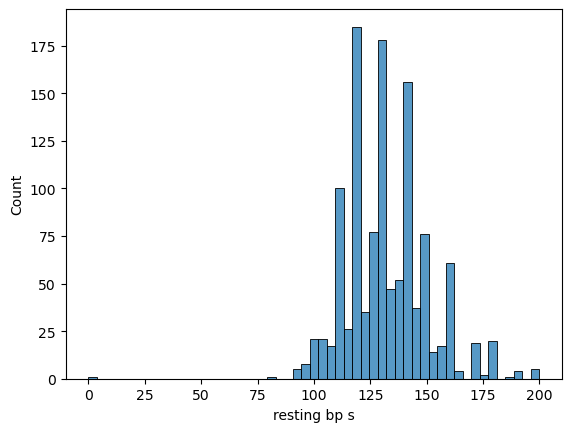

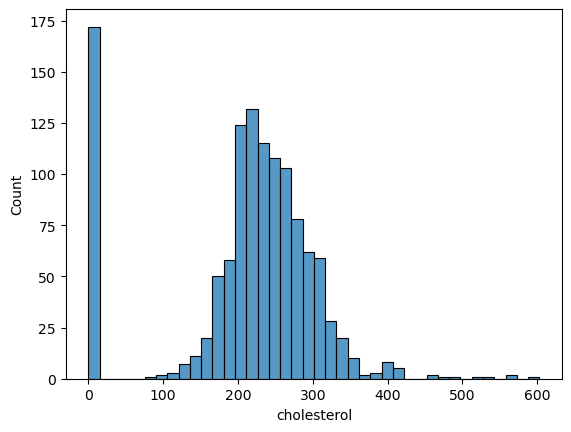

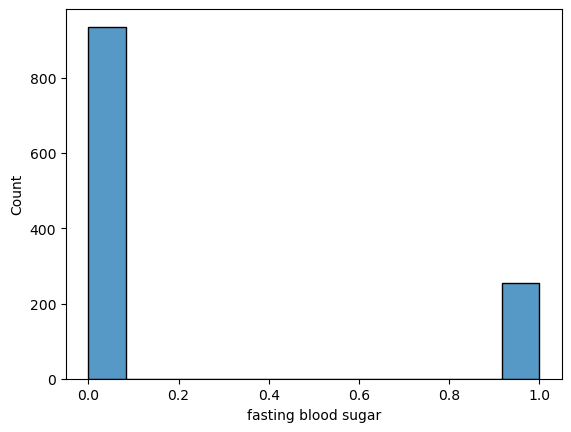

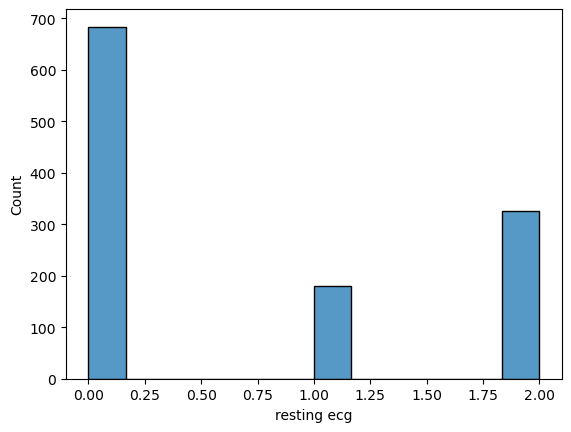

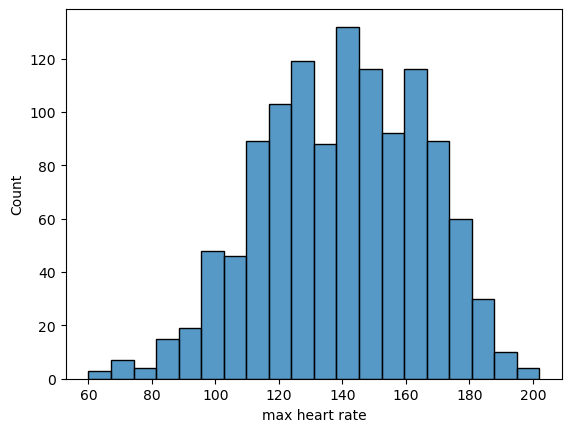

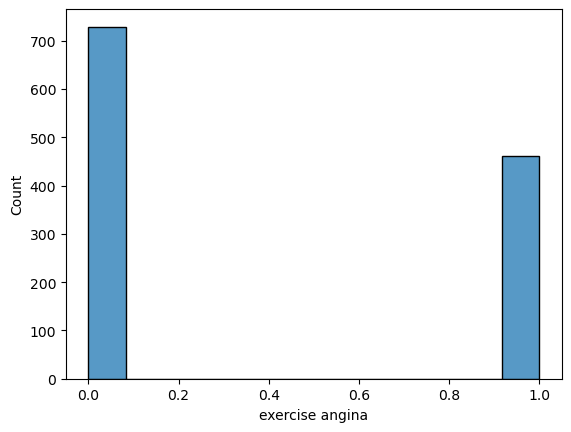

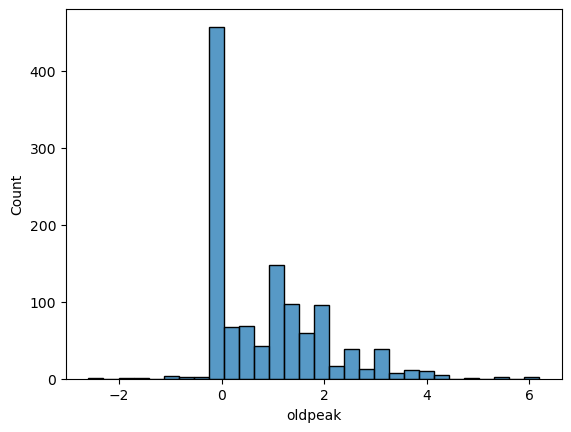

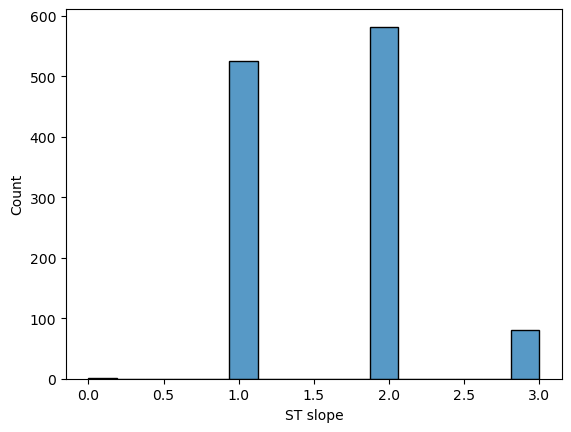

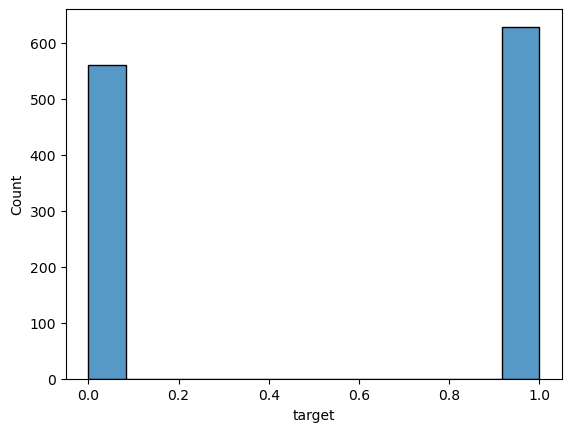

In [14]:
#hiostgram

warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

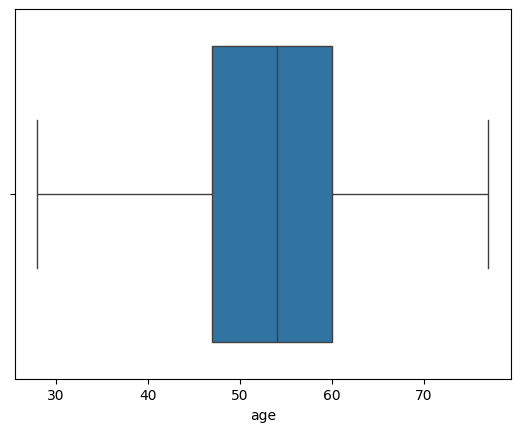

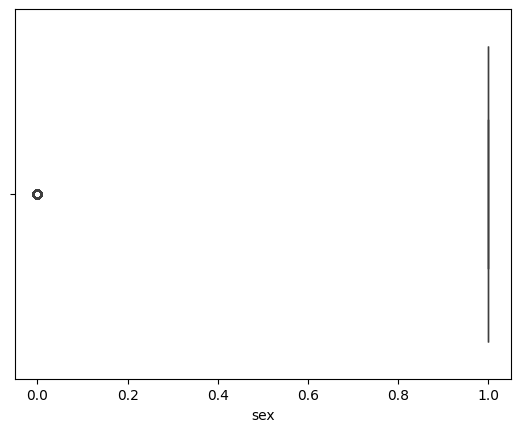

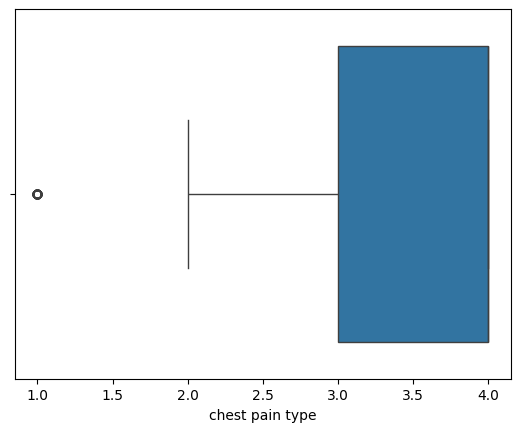

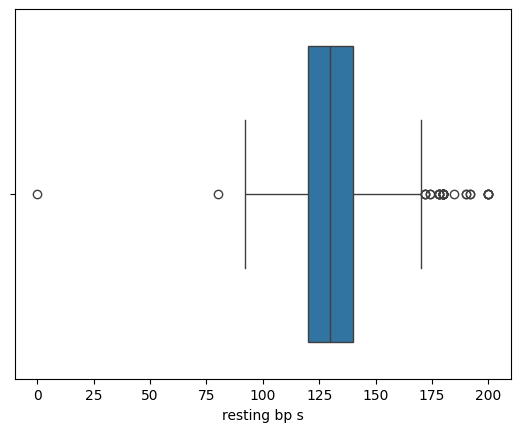

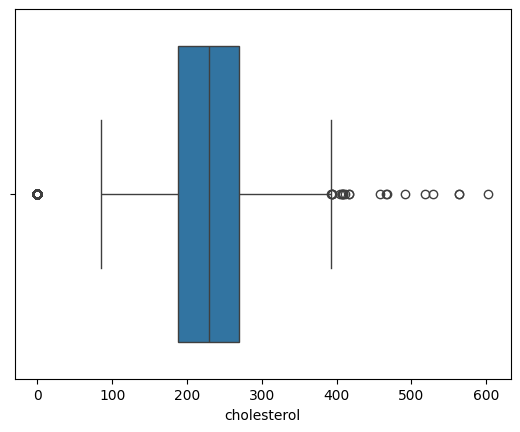

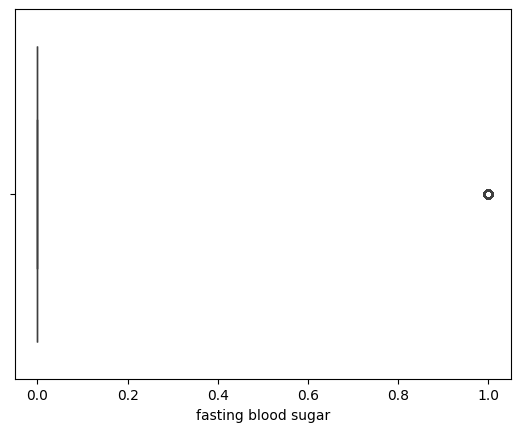

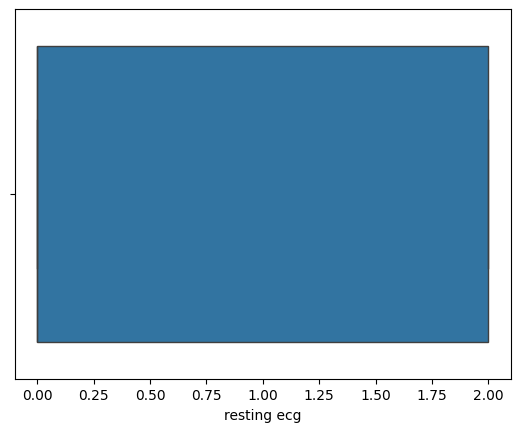

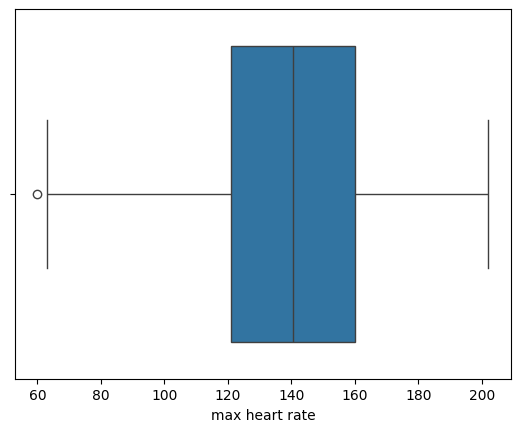

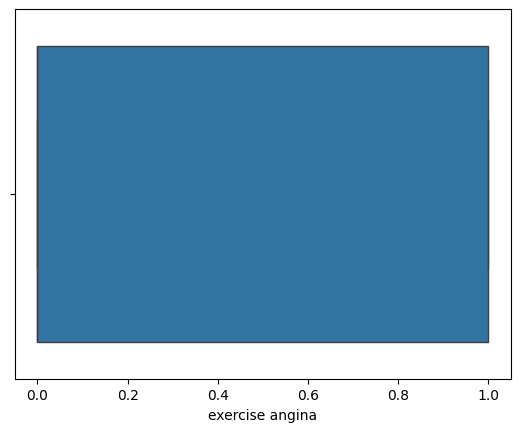

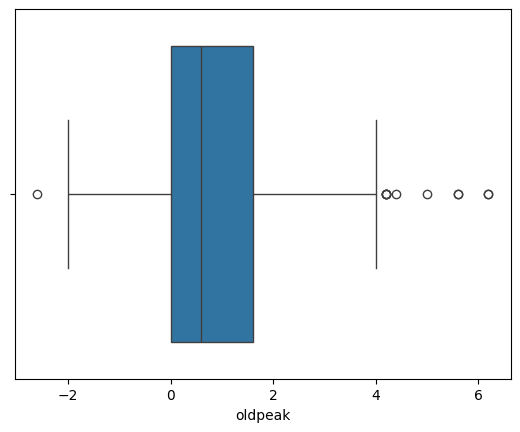

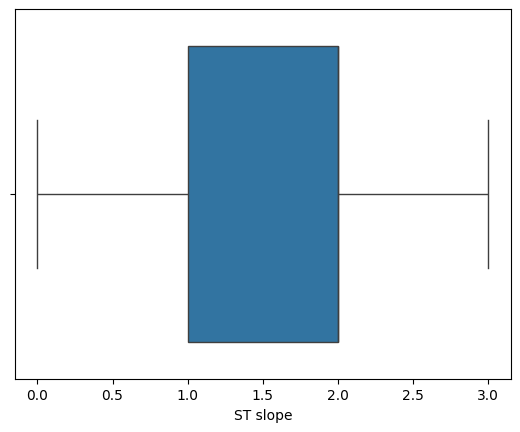

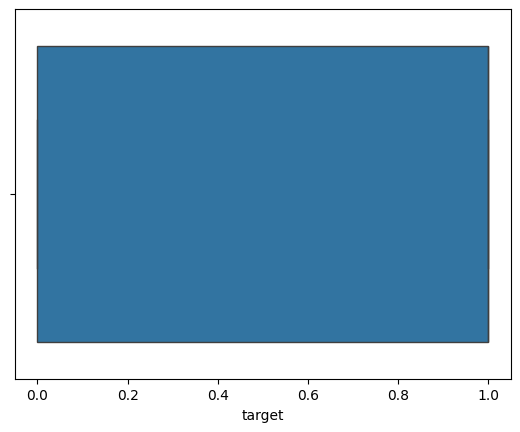

In [12]:
#box plot
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

HANDLING MISSING DATA

In [13]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

Duplicates

In [15]:
df.drop_duplicates()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# outlire treatment

ENCODING CATEGORICAL DATA

In [ ]:
pd.get_dummies(data=df,columns=["age","ST slope"],drop_first=True)

,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,target,...,age_71,age_72,age_73,age_74,age_75,age_76,age_77,ST slope_1,ST slope_2,ST slope_3
0,1,2,140,289,0,0,172,0,0.0,0,...,False,False,False,False,False,False,False,True,False,False
1,0,3,160,180,0,0,156,0,1.0,1,...,False,False,False,False,False,False,False,False,True,False
2,1,2,130,283,0,1,98,0,0.0,0,...,False,False,False,False,False,False,False,True,False,False
3,0,4,138,214,0,0,108,1,1.5,1,...,False,False,False,False,False,False,False,False,True,False
4,1,3,150,195,0,0,122,0,0.0,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1,1,110,264,0,0,132,0,1.2,1,...,False,False,False,False,False,False,False,False,True,False
1186,1,4,144,193,1,0,141,0,3.4,1,...,False,False,False,False,False,False,False,False,True,False
1187,1,4,130,131,0,0,115,1,1.2,1,...,False,False,False,False,False,False,False,False,True,False
1188,0,2,130,236,0,2,174,0,0.0,1,...,False,False,False,False,False,False,False,False,True,False


**clasification using decision tree**

In [26]:

# Split features (X) and target variable (y)
X = df.drop(columns=['target'])
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform data scaling on the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9201680672268907
Precision: 0.9307692307692308
Recall: 0.9236641221374046


In [ ]:
#**clustring using k-means**

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

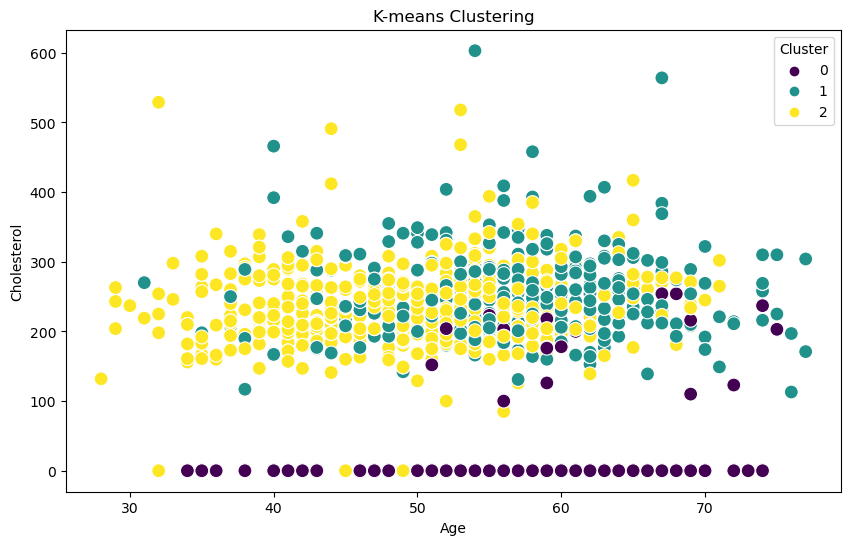

In [18]:

# Features for clustering (excluding 'target')
X = df.drop('target', axis=1)

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df['cluster'] = labels

# Print the resulting clusters
print(df)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='cholesterol', hue='cluster', data=df, palette='viridis', s=100)
plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Cluster')
plt.show()


First few rows of the dataset:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  

Summary statistics:
     

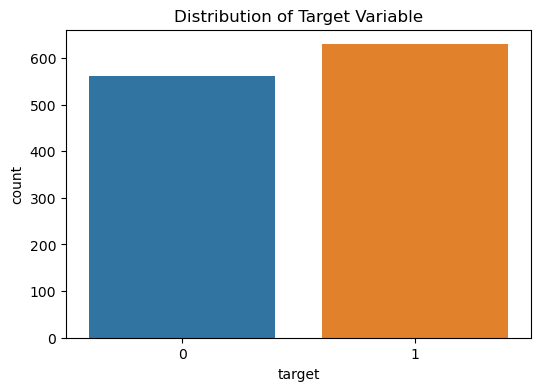

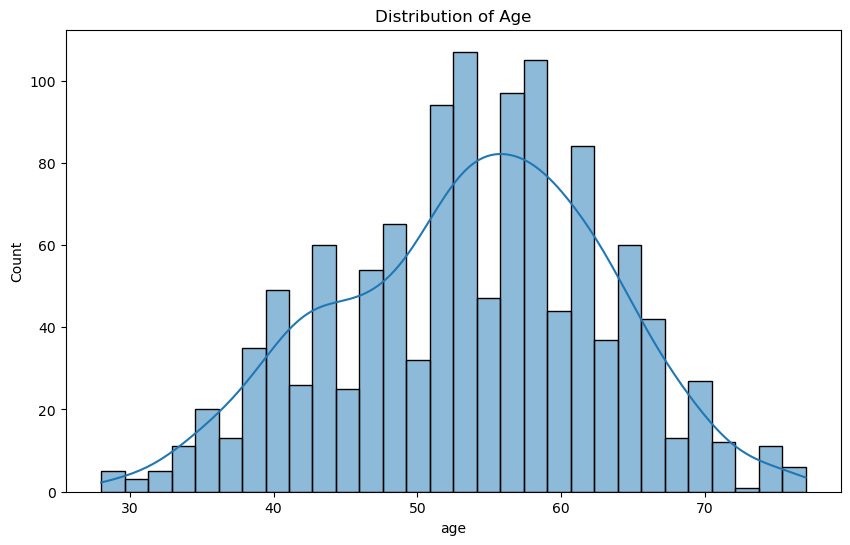

C:\Users\yousef\AppData\Local\Temp\ipykernel_16220\2008357992.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


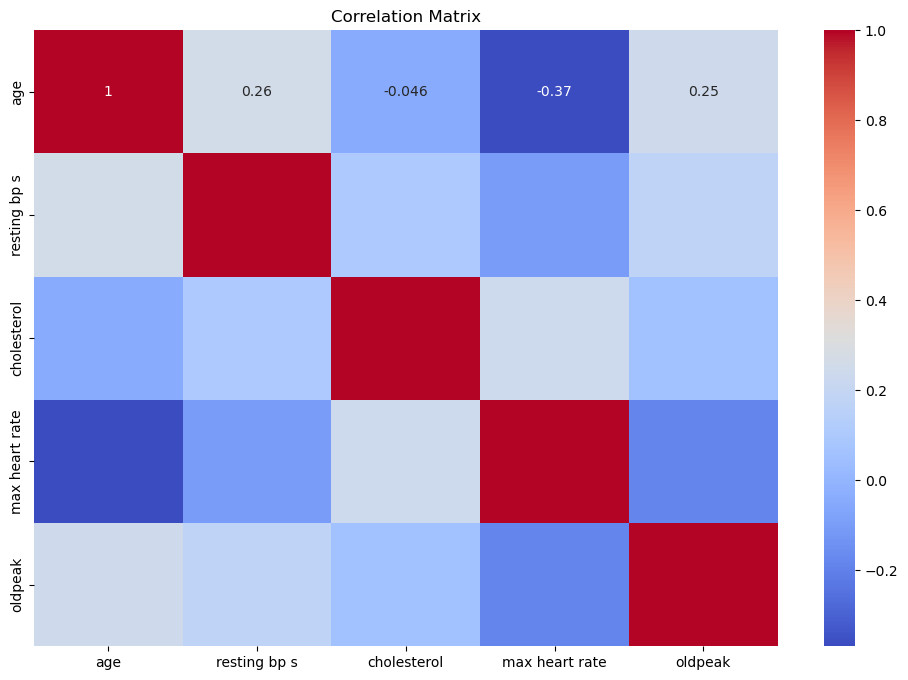

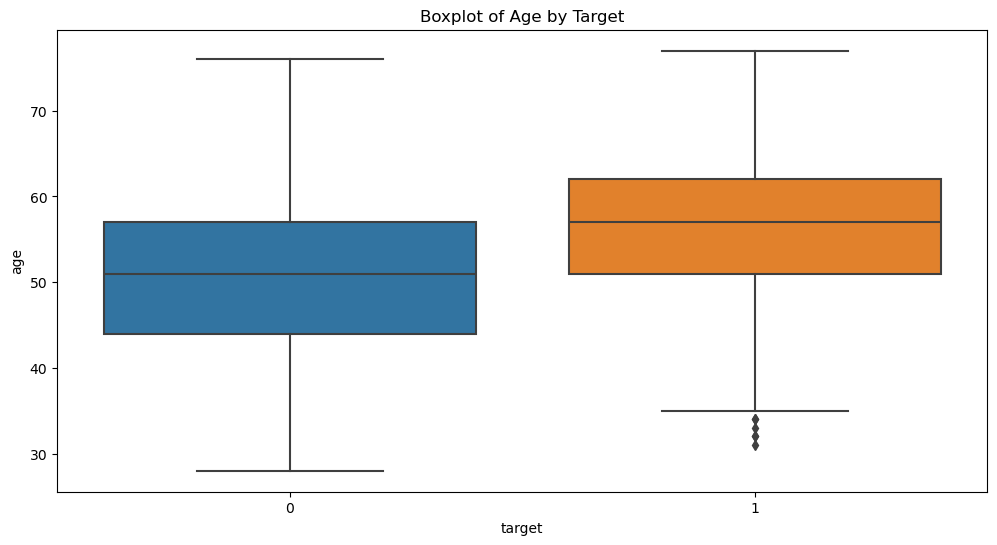

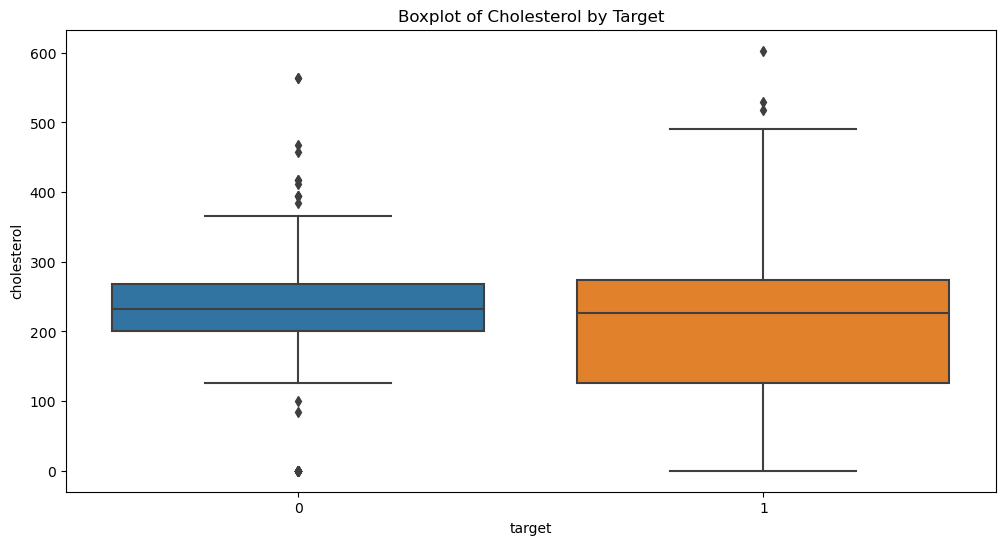

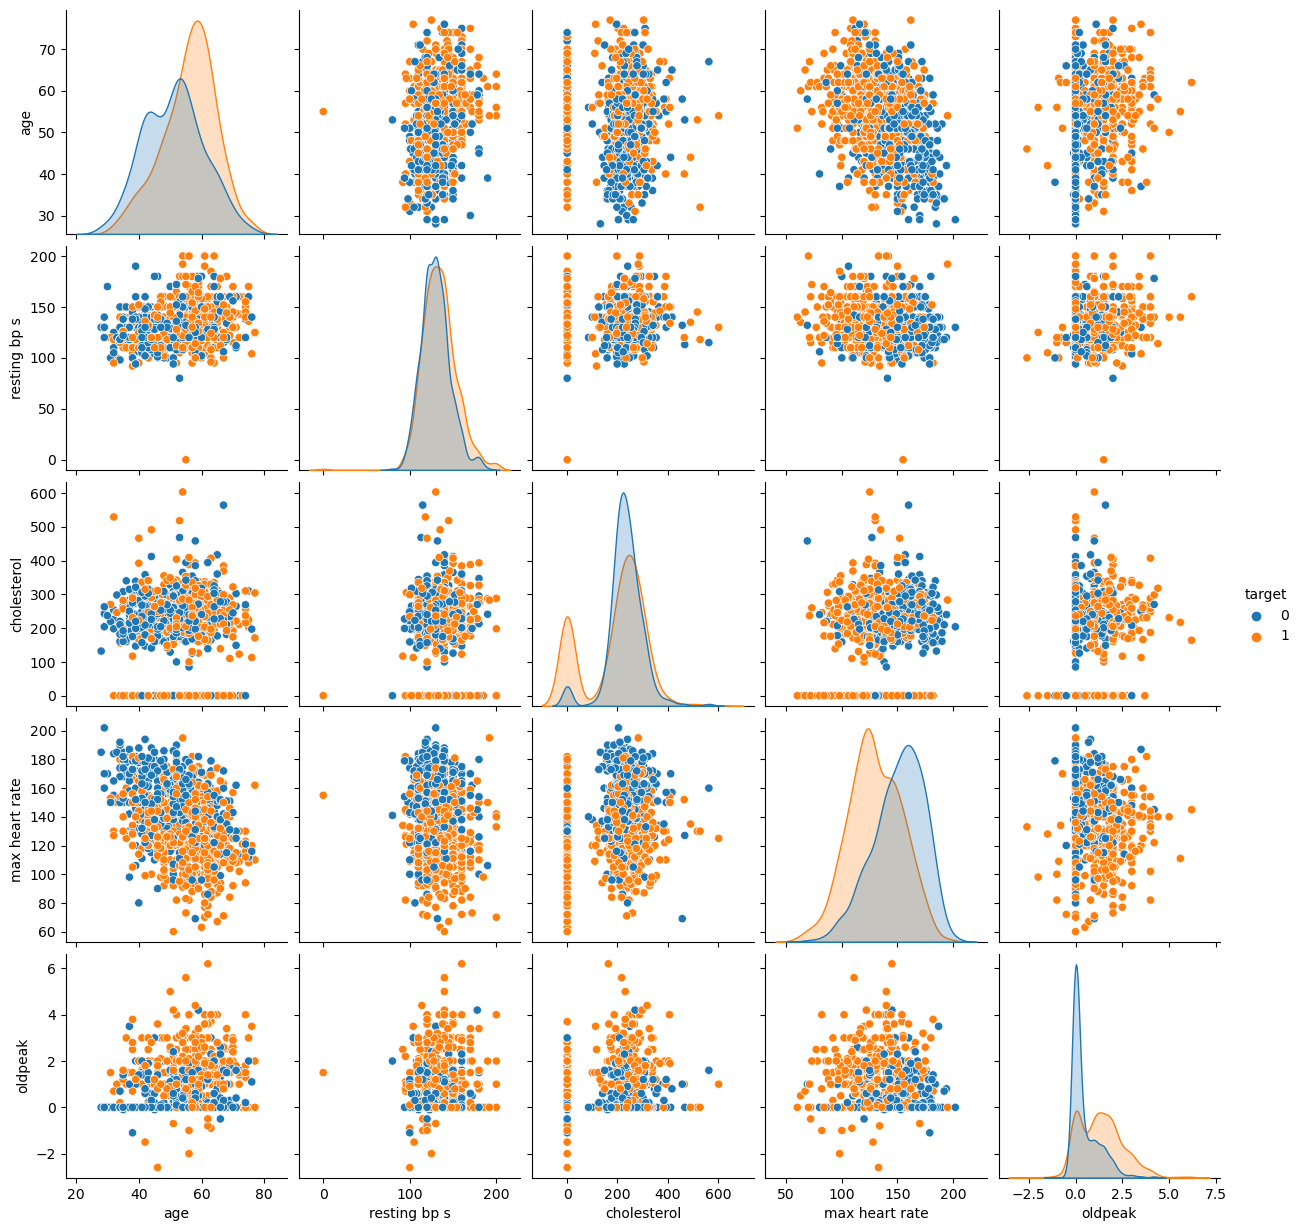

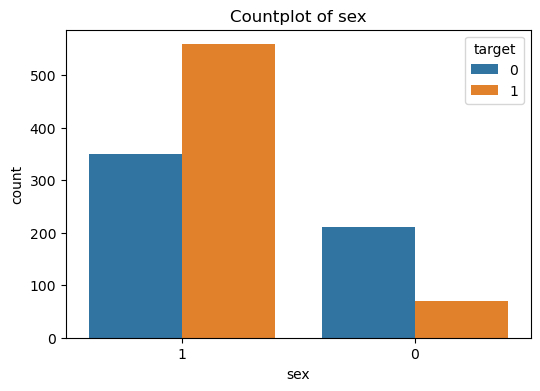

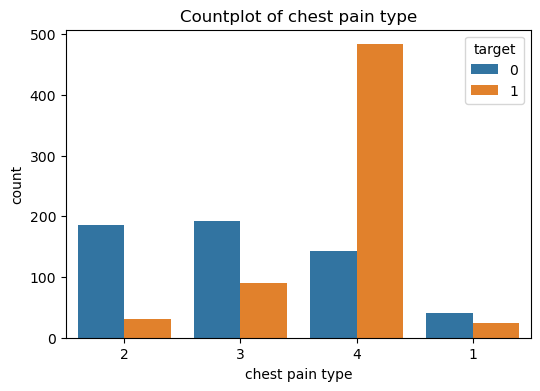

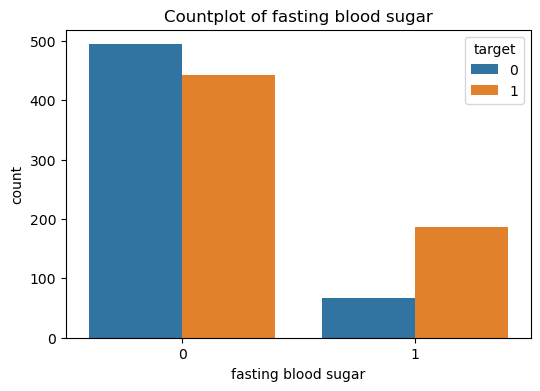

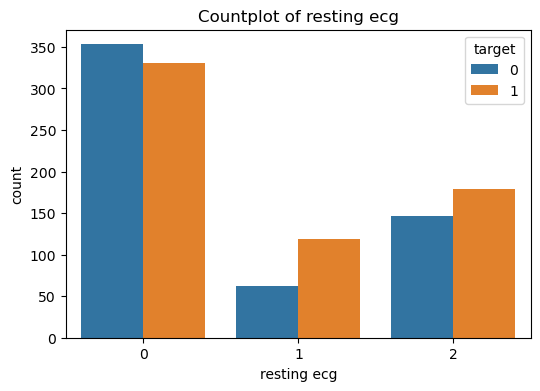

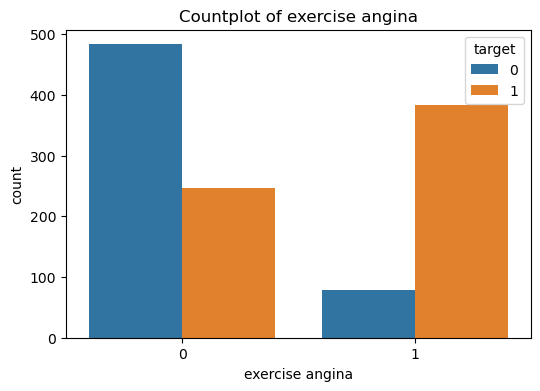

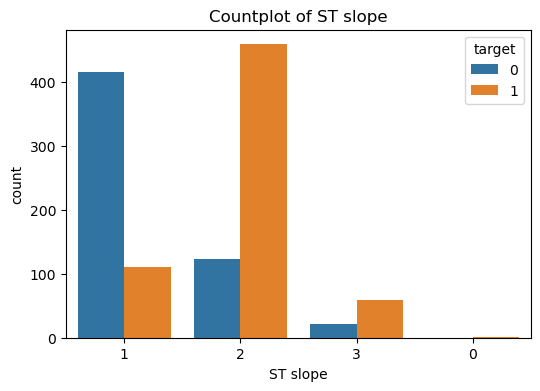

In [6]:
# EDA     


# Assuming your data is in a CSV file named 'Heart.csv'
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())

# Information about the dataset
print("\nInformation about the dataset:")
print(df.info())

# Checking for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Converting categorical columns to category dtype
categorical_columns = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']
for column in categorical_columns:
    df[column] = df[column].astype('category')

# Plotting the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Plotting the distribution of the age variable
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Plotting the correlation matrix
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplots for some key variables
plt.figure(figsize=(12,6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Boxplot of Age by Target')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='target', y='cholesterol', data=df)
plt.title('Boxplot of Cholesterol by Target')
plt.show()

# Pairplot for the dataset
sns.pairplot(df, hue='target')
plt.show()

# Converting categorical columns to strings for plotting
for column in categorical_columns:
    df[column] = df[column].astype(str)

# Count plots for categorical variables
for column in categorical_columns[:-1]:  # excluding 'target' from this loop
    plt.figure(figsize=(6,4))
    sns.countplot(x=column, data=df, hue='target')
    plt.title(f'Countplot of {column}')
    plt.show()


 Linear Regression

Train MSE: 0.010717121848739497
Test MSE: 0.06414201680672268
Train R^2: 0.9570397431134229
Test R^2: 0.7407961475351359


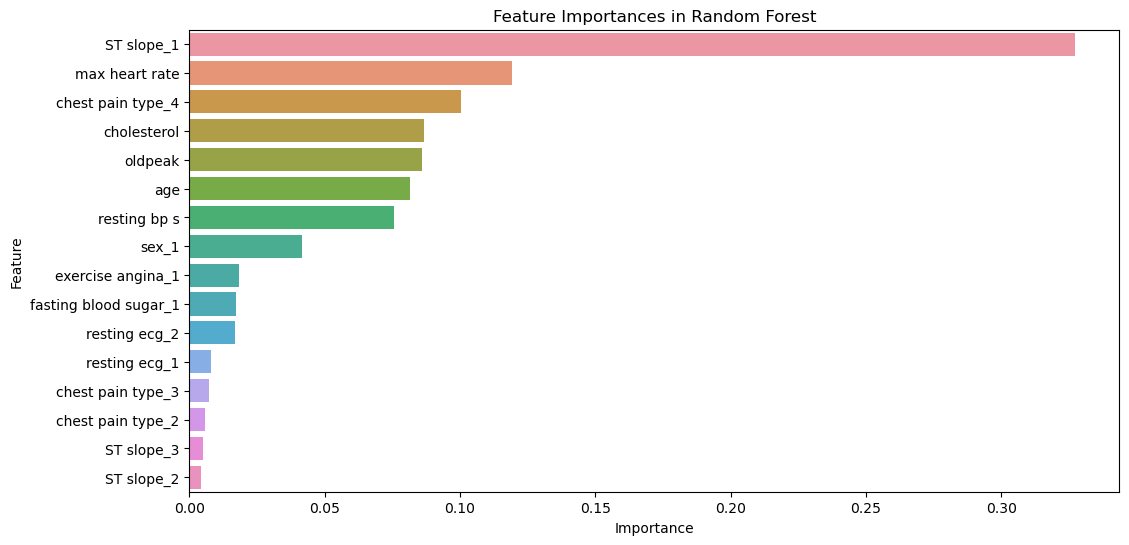

In [22]:
# Regression model (RandomForestRegressor)


# Loading the data
df = pd.read_csv('heart.csv')

# Converting categorical columns to category dtype
categorical_columns = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
for column in categorical_columns:
    df[column] = df[column].astype('category')

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Model predictions
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

# Model evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R^2: {train_r2}')
print(f'Test R^2: {test_r2}')

# Feature importance
feature_importances = rf.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in Random Forest')
plt.show()
